# Transformation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['Values'])
df.head()

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [4]:
df.shape

(1000, 1)

<Axes: xlabel='Values', ylabel='Count'>

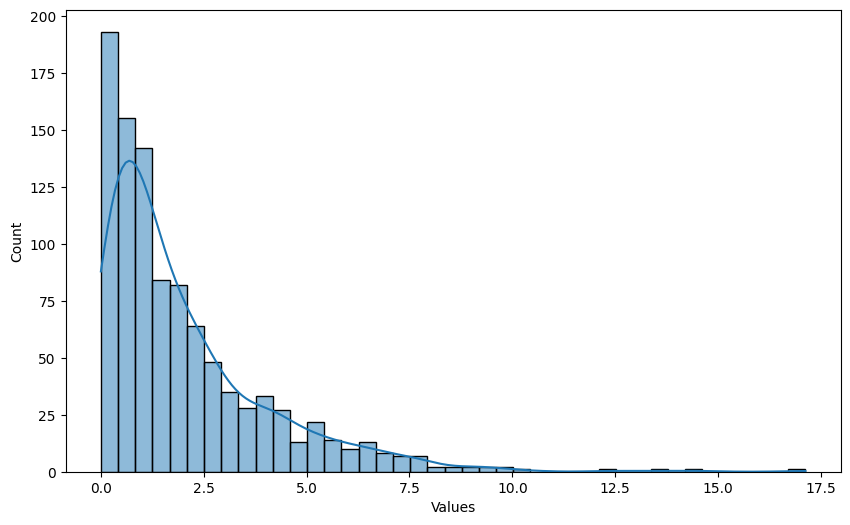

In [6]:
# Create hisplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Values'], kde=True)

In [17]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

df['Values_boxcox'] = pt_boxcox.fit_transform(df[['Values']] + 1)
df['Values_yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['Values']])
df['Values_quantile_transformation'] = qt_normal.fit_transform(df[['Values']])

In [18]:
df.head()

,Values,Values_boxcox,Values_yeo_johnson,Values_quantile_transformation
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


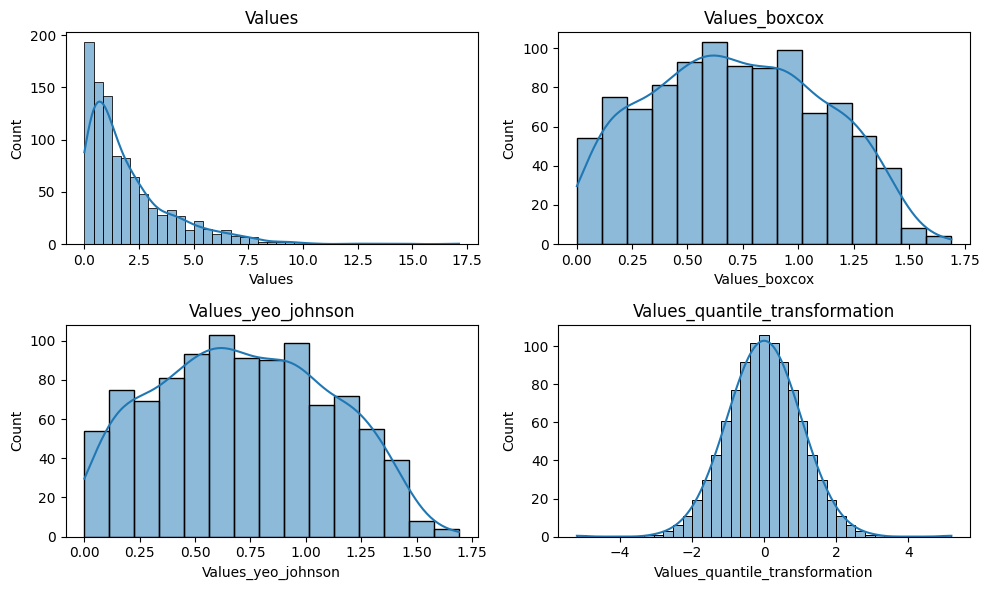

In [19]:
# Create hisplot for all three columns using fot loop
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()


-----

# Normalization

## L1 Normalization

In [23]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


## L2 Normalization

In [22]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## Z-Score Normalization (Standard Scalar)
## Min-Max Normalization (Min-Max Scalar)

# Log Transformation

In [24]:
import pandas as pd
import numpy as np

In [27]:
# Make dataset with skewed values
df = {
    "Values": [1,5, 10, 20, 100, 1000, 5000, 400, 300, 1500, 1400, 200, 400, 300]
}
df = pd.DataFrame(df)
df

,Values
0,1
1,5
2,10
3,20
4,100
5,1000
6,5000
7,400
8,300
9,1500


<Axes: xlabel='Values', ylabel='Count'>

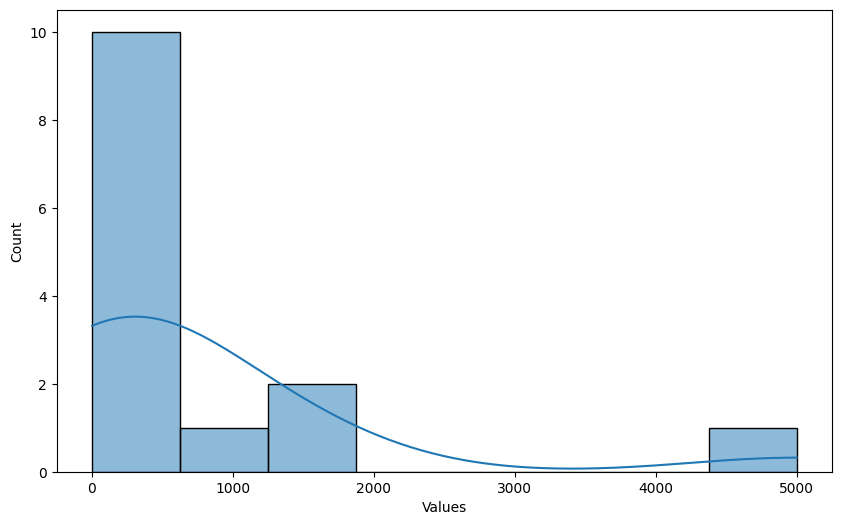

In [28]:
# Create hisplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Values'], kde=True)

In [30]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,100,4.605170
5,1000,6.907755
6,5000,8.517193
7,400,5.991465
8,300,5.703782
9,1500,7.313220


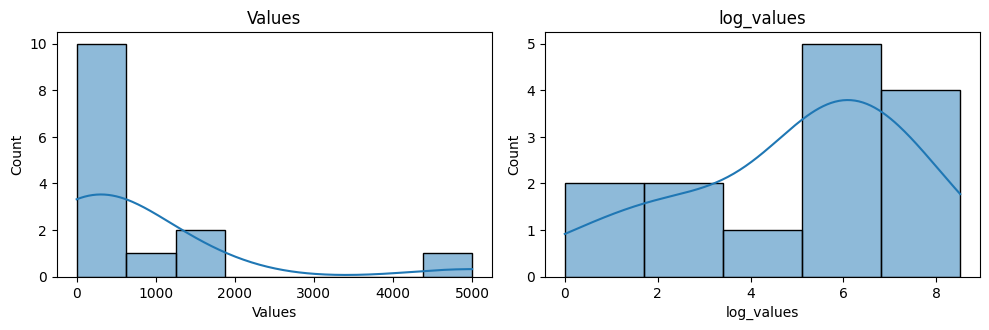

In [31]:
# Create hisplot using for loop
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
    